<a href="https://colab.research.google.com/github/DimaVladiko/CNN_Notebook/blob/main/cnn_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network
**Name Student 1:**<br>
Gosha (Gregory) Shapira<br>
**ID Student 1:**<br>
321328296<br>
**Name Student 2:**<br>
Dmitry Vladyko<br>
**ID Student 2:**<br>
320721798

### Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
###################################
import csv
import random
import cv2
from PIL import Image

tf.__version__

from google.colab import drive
drive.mount('/content/drive')

def min_size(photo_list):
  list_size = len(photo_list)
  widths = []
  heights = []
  for i in range(list_size):
    height, width, channels = photo_list[i].shape
    heights.append(height)
    widths.append(width)

  min_height = min(heights)
  min_width = min(widths)
  return min_height, min_width

Mounted at /content/drive


### Data Preprocessing - Do not run this block if custom bank is made

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Semester1_FinalProject/labels.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    data = list(reader)

data.pop(0)
print(len(data))

10222


In [ ]:
breed = []
for item in data:
  if (item[1],0) not in breed:
    breed.append((item[1],0))

print(breed)
print(len(breed))



[('boston_bull', 0), ('dingo', 0), ('pekinese', 0), ('bluetick', 0), ('golden_retriever', 0), ('bedlington_terrier', 0), ('borzoi', 0), ('basenji', 0), ('scottish_deerhound', 0), ('shetland_sheepdog', 0), ('walker_hound', 0), ('maltese_dog', 0), ('norfolk_terrier', 0), ('african_hunting_dog', 0), ('wire-haired_fox_terrier', 0), ('redbone', 0), ('lakeland_terrier', 0), ('boxer', 0), ('doberman', 0), ('otterhound', 0), ('standard_schnauzer', 0), ('irish_water_spaniel', 0), ('black-and-tan_coonhound', 0), ('cairn', 0), ('affenpinscher', 0), ('labrador_retriever', 0), ('ibizan_hound', 0), ('english_setter', 0), ('weimaraner', 0), ('giant_schnauzer', 0), ('groenendael', 0), ('dhole', 0), ('toy_poodle', 0), ('border_terrier', 0), ('tibetan_terrier', 0), ('norwegian_elkhound', 0), ('shih-tzu', 0), ('irish_terrier', 0), ('kuvasz', 0), ('german_shepherd', 0), ('greater_swiss_mountain_dog', 0), ('basset', 0), ('australian_terrier', 0), ('schipperke', 0), ('rhodesian_ridgeback', 0), ('irish_sette

**Divide the photos into 120 groups of 50 photos each:**

In [ ]:
with tf.device('/device:GPU:0'):
  drive_path = '/content/drive/MyDrive/Colab Notebooks/Semester1_FinalProject/Photos/'
  photo_bank = []
  labels = []
  print(len(photo_bank))
  while len(photo_bank) < 6000:
    rand = random.randint(0,len(data)-1)
    temp_breed = data[rand][1]
    photo_name = data[rand][0]
    index = [y[0] for y in breed].index(temp_breed)
    print("\r","Photo_bank len="+str(len(photo_bank))+" Breed len="+str(len(breed))+" Data len="+str(len(data))+" Breed Size & Breed = "+str(breed[index][1])+" , "+temp_breed ,end="")
    if breed[index][1] < 50:
      image_path = drive_path + photo_name + '.jpg'
      image = cv2.imread( image_path, cv2.COLOR_BGR2RGB)
      photo_bank.append(image)
      labels.append(temp_breed)
      breed.append((temp_breed,breed[index][1]+1))
      breed.pop(index)
      data.pop(rand)
    else:
      data.pop(rand)
  print(len(data))
  print(len(photo_bank))
  



0
 Photo_bank len=5999 Breed len=120 Data len=2047 Breed Size & Breed = 49 , briard2046
6000


In [ ]:
print('Labels: '+str(len(labels)))
print(labels)

Labels: 6000
['german_short-haired_pointer', 'groenendael', 'west_highland_white_terrier', 'english_foxhound', 'irish_setter', 'border_terrier', 'great_dane', 'vizsla', 'irish_terrier', 'silky_terrier', 'walker_hound', 'malinois', 'dandie_dinmont', 'saint_bernard', 'standard_schnauzer', 'old_english_sheepdog', 'dandie_dinmont', 'cairn', 'newfoundland', 'lhasa', 'maltese_dog', 'basenji', 'dhole', 'great_pyrenees', 'greater_swiss_mountain_dog', 'collie', 'cairn', 'english_foxhound', 'malamute', 'keeshond', 'standard_schnauzer', 'english_foxhound', 'siberian_husky', 'italian_greyhound', 'old_english_sheepdog', 'miniature_schnauzer', 'miniature_schnauzer', 'pembroke', 'samoyed', 'keeshond', 'gordon_setter', 'bouvier_des_flandres', 'sealyham_terrier', 'lakeland_terrier', 'malamute', 'black-and-tan_coonhound', 'leonberg', 'boston_bull', 'miniature_schnauzer', 'toy_terrier', 'irish_wolfhound', 'lhasa', 'appenzeller', 'maltese_dog', 'shih-tzu', 'bouvier_des_flandres', 'sussex_spaniel', 'komond

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Semester1_FinalProject/Photo_Bank/'
os.chdir(path)

In [ ]:
df = pd.DataFrame(labels)
df.to_csv('myfile.csv')

In [ ]:
print('Lables: '+str(len(labels)))

Lables: 6000


In [ ]:
#widths = []
#heights = []
#for i in range(6000):
#  height, width, channels = photo_bank[i].shape
#  heights.append(height)
#  widths.append(width)

#min_height = min(heights)
#min_width = min(widths)
min_height, min_width = min_size(photo_bank)
for i in range(6000):
  temp = cv2.resize(photo_bank[i], (min_width, min_height))
  cv2.imwrite(str(i)+'.jpg',temp)



In [ ]:
print(min_height,min_width)

103 97


# After custom photo bank is made:

**Import the new photo bank:**

In [2]:
photo_bank = []
drive_path = '/content/drive/MyDrive/Colab Notebooks/Semester1_FinalProject/Photo_Bank/'
for i in range(6000):
  image_path = drive_path + str(i) + '.jpg'
  photo_bank.append(cv2.imread( image_path, cv2.COLOR_BGR2RGB))
  if ((i+1) % 1000) == 0:
    print('Part '+str(int((i+1)/1000))+' out of 6 is loaded')

print('Photo bank size: '+str(len(photo_bank)))

labels = []
with open('/content/drive/MyDrive/Colab Notebooks/Semester1_FinalProject/Photo_Bank/myfile.csv') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',')
    next(csvfile)
    for line in csv_reader:
      labels.append(line[1])

print(labels)
labels = [''.join(ele) for ele in labels]
print('Labels size: '+str(len(labels)))

print('Must be the same size:')
print(len(photo_bank),len(labels))

min_height, min_width = min_size(photo_bank)
print(min_height,min_width)

Part 1 out of 6 is loaded
Part 2 out of 6 is loaded
Part 3 out of 6 is loaded
Part 4 out of 6 is loaded
Part 5 out of 6 is loaded
Part 6 out of 6 is loaded
Photo bank size: 6000
['german_short-haired_pointer', 'groenendael', 'west_highland_white_terrier', 'english_foxhound', 'irish_setter', 'border_terrier', 'great_dane', 'vizsla', 'irish_terrier', 'silky_terrier', 'walker_hound', 'malinois', 'dandie_dinmont', 'saint_bernard', 'standard_schnauzer', 'old_english_sheepdog', 'dandie_dinmont', 'cairn', 'newfoundland', 'lhasa', 'maltese_dog', 'basenji', 'dhole', 'great_pyrenees', 'greater_swiss_mountain_dog', 'collie', 'cairn', 'english_foxhound', 'malamute', 'keeshond', 'standard_schnauzer', 'english_foxhound', 'siberian_husky', 'italian_greyhound', 'old_english_sheepdog', 'miniature_schnauzer', 'miniature_schnauzer', 'pembroke', 'samoyed', 'keeshond', 'gordon_setter', 'bouvier_des_flandres', 'sealyham_terrier', 'lakeland_terrier', 'malamute', 'black-and-tan_coonhound', 'leonberg', 'boston

# Branching out to different Experiments:

Simple test on a "default" Neural Network

In [ ]:
new_bank = []
for photo in photo_bank:
  pic = np.array(photo)
  pic = pic.astype('float32')
  pic /= 255.0
  new_bank.append(pic)

In [ ]:
target_dict={k: v for v, k in enumerate(np.unique(labels))}
print(target_dict)
target_val=  [target_dict[labels[i]] for i in range(len(labels))]
print(target_val)

{'affenpinscher': 0, 'afghan_hound': 1, 'african_hunting_dog': 2, 'airedale': 3, 'american_staffordshire_terrier': 4, 'appenzeller': 5, 'australian_terrier': 6, 'basenji': 7, 'basset': 8, 'beagle': 9, 'bedlington_terrier': 10, 'bernese_mountain_dog': 11, 'black-and-tan_coonhound': 12, 'blenheim_spaniel': 13, 'bloodhound': 14, 'bluetick': 15, 'border_collie': 16, 'border_terrier': 17, 'borzoi': 18, 'boston_bull': 19, 'bouvier_des_flandres': 20, 'boxer': 21, 'brabancon_griffon': 22, 'briard': 23, 'brittany_spaniel': 24, 'bull_mastiff': 25, 'cairn': 26, 'cardigan': 27, 'chesapeake_bay_retriever': 28, 'chihuahua': 29, 'chow': 30, 'clumber': 31, 'cocker_spaniel': 32, 'collie': 33, 'curly-coated_retriever': 34, 'dandie_dinmont': 35, 'dhole': 36, 'dingo': 37, 'doberman': 38, 'english_foxhound': 39, 'english_setter': 40, 'english_springer': 41, 'entlebucher': 42, 'eskimo_dog': 43, 'flat-coated_retriever': 44, 'french_bulldog': 45, 'german_shepherd': 46, 'german_short-haired_pointer': 47, 'gian

### Building NN

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(min_height, min_width, 3))) # According to the dim of the photos
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(120)) # There are 120 breeds

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 101, 95, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 47, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 45, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 20, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 10, 64)       0

In [ ]:
nn_data = np.array(new_bank, np.float32)
nn_labels = np.array(list(map(int,target_val)), np.float32)

### Training NN

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(nn_data,nn_labels,batch_size=16, epochs=20,validation_split=0.3)

Epoch 1/20
263/263 [==============================] - 14s 16ms/step - loss: 4.7890 - accuracy: 0.0102 - val_loss: 4.7961 - val_accuracy: 0.0000e+00
Epoch 2/20
263/263 [==============================] - 4s 14ms/step - loss: 4.7851 - accuracy: 0.0124 - val_loss: 4.8011 - val_accuracy: 0.0000e+00
Epoch 3/20
263/263 [==============================] - 4s 14ms/step - loss: 4.7834 - accuracy: 0.0083 - val_loss: 4.8116 - val_accuracy: 0.0000e+00
Epoch 4/20
263/263 [==============================] - 4s 14ms/step - loss: 4.7824 - accuracy: 0.0119 - val_loss: 4.8138 - val_accuracy: 0.0000e+00
Epoch 5/20
263/263 [==============================] - 4s 14ms/step - loss: 4.7797 - accuracy: 0.0102 - val_loss: 4.8241 - val_accuracy: 0.0000e+00
Epoch 6/20
263/263 [==============================] - 4s 14ms/step - loss: 4.7778 - accuracy: 0.0107 - val_loss: 4.8343 - val_accuracy: 0.0000e+00
Epoch 7/20
263/263 [==============================] - 4s 14ms/step - loss: 4.7772 - accuracy: 0.0107 - val_loss: 4.83

### Visualization of Loss and Accuracy

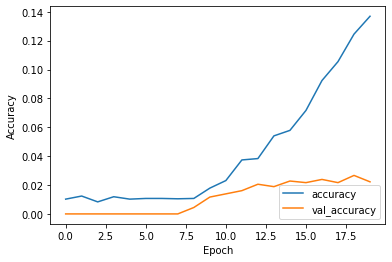

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

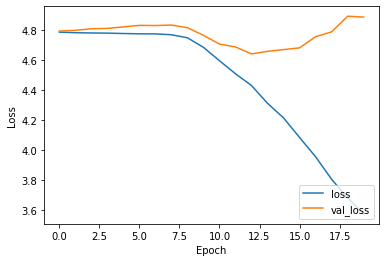

In [ ]:

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

# Experiment number 1: Simple CNN

This experiment is based on a simple and default neural network.

In [ ]:
exp1_new_bank = []
for photo in photo_bank:
  temp = cv2.resize(photo_bank[i], (64, 64))
  exp1_new_bank.append(temp)
new_data = np.array(exp1_new_bank, np.float32)
print(exp1_new_bank[1].shape)

(64, 64, 3)


In [ ]:
target_dict={k: v for v, k in enumerate(np.unique(labels))}
print(target_dict)
target_val=  [target_dict[labels[i]] for i in range(len(labels))]
print(target_val)
#nn_data = np.array(new_bank, np.float32)
nn_labels = np.array(list(map(int,target_val)), np.float32)

{'affenpinscher': 0, 'afghan_hound': 1, 'african_hunting_dog': 2, 'airedale': 3, 'american_staffordshire_terrier': 4, 'appenzeller': 5, 'australian_terrier': 6, 'basenji': 7, 'basset': 8, 'beagle': 9, 'bedlington_terrier': 10, 'bernese_mountain_dog': 11, 'black-and-tan_coonhound': 12, 'blenheim_spaniel': 13, 'bloodhound': 14, 'bluetick': 15, 'border_collie': 16, 'border_terrier': 17, 'borzoi': 18, 'boston_bull': 19, 'bouvier_des_flandres': 20, 'boxer': 21, 'brabancon_griffon': 22, 'briard': 23, 'brittany_spaniel': 24, 'bull_mastiff': 25, 'cairn': 26, 'cardigan': 27, 'chesapeake_bay_retriever': 28, 'chihuahua': 29, 'chow': 30, 'clumber': 31, 'cocker_spaniel': 32, 'collie': 33, 'curly-coated_retriever': 34, 'dandie_dinmont': 35, 'dhole': 36, 'dingo': 37, 'doberman': 38, 'english_foxhound': 39, 'english_setter': 40, 'english_springer': 41, 'entlebucher': 42, 'eskimo_dog': 43, 'flat-coated_retriever': 44, 'french_bulldog': 45, 'german_shepherd': 46, 'german_short-haired_pointer': 47, 'gian

In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.Dense(80, activation='relu'))
cnn.add(tf.keras.layers.Dense(120, activation='softmax'))
cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 48)        1344      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 48)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 48)        20784     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 48)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        13856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 32)        

In [ ]:
cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = cnn.fit(new_data,nn_labels, epochs=30,validation_split=0.3)

Epoch 1/30
132/132 [==============================] - 3s 18ms/step - loss: 5.4733 - accuracy: 0.0093 - val_loss: 4.7920 - val_accuracy: 0.0000e+00
Epoch 2/30
132/132 [==============================] - 2s 15ms/step - loss: 4.7857 - accuracy: 0.0098 - val_loss: 4.7970 - val_accuracy: 0.0000e+00
Epoch 3/30
132/132 [==============================] - 2s 15ms/step - loss: 4.7838 - accuracy: 0.0117 - val_loss: 4.8025 - val_accuracy: 0.0000e+00
Epoch 4/30
132/132 [==============================] - 2s 15ms/step - loss: 4.7822 - accuracy: 0.0110 - val_loss: 4.8090 - val_accuracy: 0.0000e+00
Epoch 5/30
132/132 [==============================] - 2s 15ms/step - loss: 4.7806 - accuracy: 0.0105 - val_loss: 4.8176 - val_accuracy: 0.0000e+00
Epoch 6/30
132/132 [==============================] - 2s 17ms/step - loss: 4.7790 - accuracy: 0.0119 - val_loss: 4.8265 - val_accuracy: 0.0000e+00
Epoch 7/30
132/132 [==============================] - 2s 15ms/step - loss: 4.7775 - accuracy: 0.0119 - val_loss: 4.835

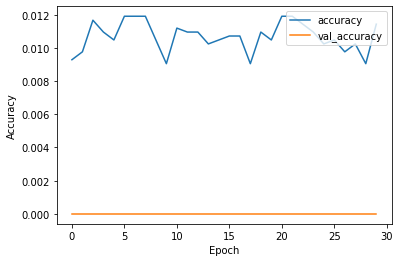

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')

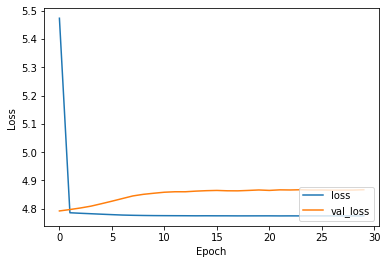

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

# Experiment number 2: Data Augmentation

In this experiment we will use the CNN from the previous experiment. However, we will try to get better results by increasing the amount of the data provided.
To increase the amount of the data, we will augument each image to get different versions of the same image. In this experiment, for each photo we will save the original, save a mirrored copy and 3 copies of the original image but rotated 90 degrees (each time) clockwize, thus increasing the amount of photos from 6000 to 30,000

In [ ]:
width = photo_bank[0].shape[0]
height = photo_bank[0].shape[1]
print(width,height)
if(width < height):
  size = width
else:
  size = height
print(size)

103 97
97


In [ ]:
print(len(photo_bank),len(labels))
exp2_new_bank = []
exp2_new_labels = []
for i in range(len(photo_bank)):
  temp = cv2.resize(photo_bank[i],(size,size))
  temp_label = labels[i]
  #add og
  exp2_new_bank.append(temp)
  exp2_new_labels.append(temp_label)
  #mirror horizontaly
  temp = cv2.flip(temp, 1)
  exp2_new_bank.append(temp)
  exp2_new_labels.append(temp_label)
  #rotate 90 clockwise >
  temp = cv2.rotate(temp, cv2.cv2.ROTATE_90_CLOCKWISE)
  exp2_new_bank.append(temp)
  exp2_new_labels.append(temp_label)
  #rotate 90 clockwise again v
  temp = cv2.rotate(temp, cv2.cv2.ROTATE_90_CLOCKWISE)
  exp2_new_bank.append(temp)
  exp2_new_labels.append(temp_label)
  #rotate 90 clockwise again <
  temp = cv2.rotate(temp, cv2.cv2.ROTATE_90_CLOCKWISE)
  exp2_new_bank.append(temp)
  exp2_new_labels.append(temp_label)
print(len(exp2_new_bank),len(exp2_new_labels))

6000 6000
30000 30000


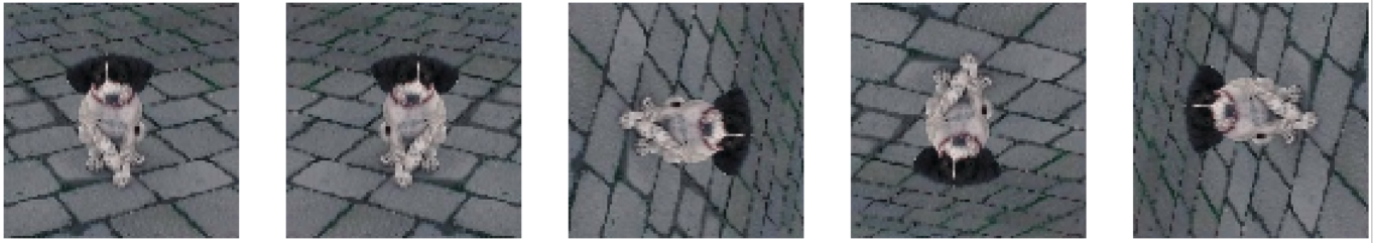

In [ ]:
exp2_bank = []
for photo in exp2_new_bank:
  pic = np.array(photo)
  pic = pic.astype('float32')
  pic /= 255.0
  exp2_bank.append(pic)
target_dict={k: v for v, k in enumerate(np.unique(exp2_new_labels))}
#print(target_dict)
target_val=  [target_dict[exp2_new_labels[i]] for i in range(len(exp2_new_labels))]
exp2_nn_data = np.array(exp2_bank, np.float32) # black and white photos are (64,64) unlike the rest (64,64,3)
exp2_nn_labels = np.array(list(map(int,target_val)), np.float32)
print(len(exp2_nn_data),len(exp2_nn_labels))
del exp2_new_bank[:]
del exp2_new_bank
del exp2_new_labels[:]
del exp2_new_labels

30000 30000


In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[size, size, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.Dense(80, activation='relu'))
cnn.add(tf.keras.layers.Dense(120, activation='softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 95, 95, 48)        1344      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 48)        20784     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 32)        13856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 32)       0

In [ ]:
cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = cnn.fit(exp2_nn_data,exp2_nn_labels, epochs=30,validation_split=0.3)

Epoch 1/30
657/657 [==============================] - 31s 32ms/step - loss: 4.7448 - accuracy: 0.0131 - val_loss: 4.7025 - val_accuracy: 0.0110
Epoch 2/30
657/657 [==============================] - 18s 28ms/step - loss: 4.5308 - accuracy: 0.0244 - val_loss: 4.5928 - val_accuracy: 0.0166
Epoch 3/30
657/657 [==============================] - 18s 28ms/step - loss: 4.3291 - accuracy: 0.0461 - val_loss: 4.5156 - val_accuracy: 0.0239
Epoch 4/30
657/657 [==============================] - 18s 28ms/step - loss: 4.1483 - accuracy: 0.0658 - val_loss: 4.5333 - val_accuracy: 0.0331
Epoch 5/30
657/657 [==============================] - 18s 28ms/step - loss: 3.9666 - accuracy: 0.0852 - val_loss: 4.5833 - val_accuracy: 0.0397
Epoch 6/30
657/657 [==============================] - 18s 28ms/step - loss: 3.7656 - accuracy: 0.1109 - val_loss: 4.7512 - val_accuracy: 0.0383
Epoch 7/30
657/657 [==============================] - 21s 31ms/step - loss: 3.5571 - accuracy: 0.1445 - val_loss: 4.9202 - val_accuracy:

In [ ]:
del exp2_nn_data
del exp2_nn_labels

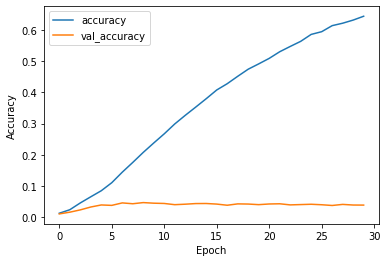

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

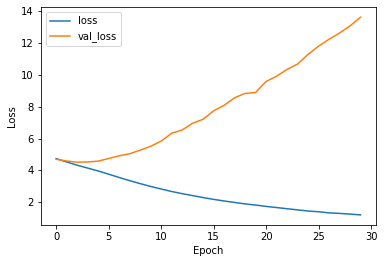

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

In [ ]:
del history
del cnn

# Experiment number 3: Feature Extraction

In this experiment we will use feature extraction to get uniqe attributes of each photo and send them through the CNN, these features might help the network learn more efficiently. We will use the Sobel alorithm to find edges on the X, Y, and both XY axis. And we will use the Canny algorithm to find egdes. 

In [ ]:
print(len(photo_bank),len(labels))
# Convert to graycsale
img_gray = cv2.cvtColor(photo_bank[4], cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)
# Sobel Edge Detection on the X axis
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) 
# Sobel Edge Detection on the Y axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) 
# Combined X and Y Sobel Edge Detection
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) 
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)
print("Sobx: "+str(sobelx.shape)+" soby: "+str(sobely.shape)+" sobxy: "+str(sobelxy.shape)+" edges: "+str(edges.shape))

6000 6000
Sobx: (103, 97) soby: (103, 97) sobxy: (103, 97) edges: (103, 97)


In [ ]:
print(len(photo_bank),len(labels))
exp3_feature_bank = []
exp3_new_labels = []
for i in range(len(photo_bank)):
  # Convert to graycsale
  img_gray = cv2.cvtColor(photo_bank[i], cv2.COLOR_BGR2GRAY)
  # Blur the image for better edge detection
  img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)
  # Sobel Edge Detection on the X axis
  sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
  exp3_feature_bank.append(sobelx)
  exp3_new_labels.append(labels[i])
  # Sobel Edge Detection on the Y axis
  sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
  exp3_feature_bank.append(sobely)
  exp3_new_labels.append(labels[i]) 
  # Combined X and Y Sobel Edge Detection
  sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
  exp3_feature_bank.append(sobelxy)
  exp3_new_labels.append(labels[i]) 
  # Canny Edge Detection
  edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)
  exp3_feature_bank.append(edges)
  exp3_new_labels.append(labels[i])
print(len(exp3_feature_bank),len(exp3_new_labels))

6000 6000
24000 24000


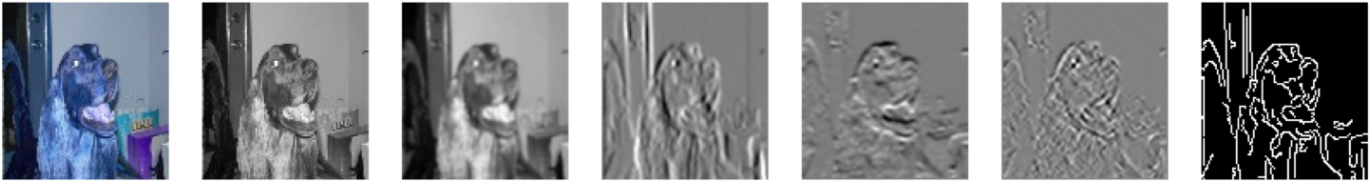

In [ ]:
exp3_bank = []
for photo in exp3_feature_bank:
  pic = np.array(photo)
  pic = pic.astype('float32')
  pic /= 255.0
  exp3_bank.append(pic)
target_dict={k: v for v, k in enumerate(np.unique(exp3_new_labels))}
target_val=  [target_dict[exp3_new_labels[i]] for i in range(len(exp3_new_labels))]
exp3_nn_data = np.array(exp3_bank, np.float32)
exp3_nn_labels = np.array(list(map(int,target_val)), np.float32)
print(len(exp3_nn_data),len(exp3_nn_labels))
print(exp3_nn_data[0].shape)
del exp3_feature_bank[:]
del exp3_feature_bank
del exp3_new_labels[:]
del exp3_new_labels

24000 24000
(103, 97)


In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[103,97,1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.Dense(80, activation='relu'))
cnn.add(tf.keras.layers.Dense(120, activation='softmax'))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 101, 95, 48)       480       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 47, 48)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 48, 45, 48)        20784     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 22, 48)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 20, 32)        13856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 11, 10, 32)      

In [ ]:
cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = cnn.fit(exp3_nn_data,exp3_nn_labels, epochs=30,validation_split=0.3)

Epoch 1/30
525/525 [==============================] - 17s 31ms/step - loss: 4.7834 - accuracy: 0.0114 - val_loss: 4.8508 - val_accuracy: 0.0024
Epoch 2/30
525/525 [==============================] - 16s 30ms/step - loss: 4.6476 - accuracy: 0.0333 - val_loss: 4.9976 - val_accuracy: 0.0150
Epoch 3/30
525/525 [==============================] - 15s 29ms/step - loss: 4.0344 - accuracy: 0.1258 - val_loss: 5.6325 - val_accuracy: 0.0153
Epoch 4/30
525/525 [==============================] - 15s 29ms/step - loss: 3.1281 - accuracy: 0.2824 - val_loss: 7.1054 - val_accuracy: 0.0137
Epoch 5/30
525/525 [==============================] - 15s 29ms/step - loss: 2.3135 - accuracy: 0.4444 - val_loss: 8.9238 - val_accuracy: 0.0143
Epoch 6/30
525/525 [==============================] - 16s 30ms/step - loss: 1.6940 - accuracy: 0.5792 - val_loss: 11.4164 - val_accuracy: 0.0132
Epoch 7/30
525/525 [==============================] - 16s 30ms/step - loss: 1.2531 - accuracy: 0.6805 - val_loss: 13.9150 - val_accurac

In [ ]:
del exp3_nn_data
del exp3_nn_labels

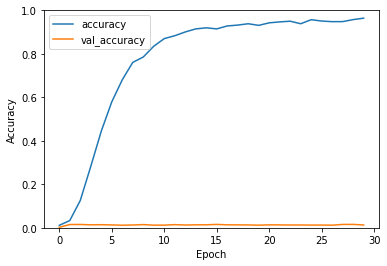

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

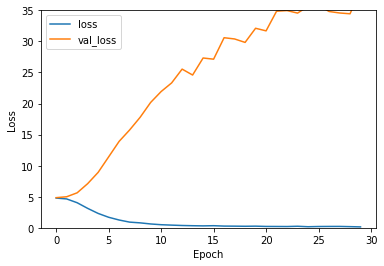

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

In [ ]:
del history
del cnn

# Experiment number 4 (The Chosen architecture):
Augmentation and Feature Extraction


In this final experiment we will use both augmentation and feature extraction.
Using both techniqes supposed to help get better results

In [3]:
width = photo_bank[0].shape[0]
height = photo_bank[0].shape[1]
print(width,height)
if(width < height):
  size = width
else:
  size = height
print(size)

103 97
97


In [4]:
print(len(photo_bank),len(labels))
exp4_new_bank = []
exp4_new_labels = []
for i in range(len(photo_bank)):
  temp = cv2.resize(photo_bank[i],(size,size))
  temp_label = labels[i]
  #add og
  exp4_new_bank.append(temp)
  exp4_new_labels.append(temp_label)
  #mirror horizontaly
  temp = cv2.flip(temp, 1)
  exp4_new_bank.append(temp)
  exp4_new_labels.append(temp_label)
  #rotate 90 clockwise >
  temp = cv2.rotate(temp, cv2.cv2.ROTATE_90_CLOCKWISE)
  exp4_new_bank.append(temp)
  exp4_new_labels.append(temp_label)
  #rotate 90 clockwise again v
  temp = cv2.rotate(temp, cv2.cv2.ROTATE_90_CLOCKWISE)
  exp4_new_bank.append(temp)
  exp4_new_labels.append(temp_label)
  #rotate 90 clockwise again <
  temp = cv2.rotate(temp, cv2.cv2.ROTATE_90_CLOCKWISE)
  exp4_new_bank.append(temp)
  exp4_new_labels.append(temp_label)

print(len(exp4_new_bank),len(exp4_new_labels))

6000 6000
30000 30000


In [5]:
exp4_feature_bank = []
exp4_feature_labels = []
for index in range(len(exp4_new_bank)):
  feature_matrix = np.zeros((size,size))
  photo = exp4_new_bank[index]
  for i in range(0,photo.shape[0]):
    for j in range(0,photo.shape[1]):
      feature_matrix[i][j] = ((int(photo[i,j,0]) + int(photo[i,j,1]) + int(photo[i,j,2]))/3)
  exp4_feature_bank.append(feature_matrix)
  exp4_feature_labels.append(exp4_new_labels[index])
print(len(exp4_feature_bank),len(exp4_feature_labels))

30000 30000


In [6]:
print(exp4_feature_labels)

['german_short-haired_pointer', 'german_short-haired_pointer', 'german_short-haired_pointer', 'german_short-haired_pointer', 'german_short-haired_pointer', 'groenendael', 'groenendael', 'groenendael', 'groenendael', 'groenendael', 'west_highland_white_terrier', 'west_highland_white_terrier', 'west_highland_white_terrier', 'west_highland_white_terrier', 'west_highland_white_terrier', 'english_foxhound', 'english_foxhound', 'english_foxhound', 'english_foxhound', 'english_foxhound', 'irish_setter', 'irish_setter', 'irish_setter', 'irish_setter', 'irish_setter', 'border_terrier', 'border_terrier', 'border_terrier', 'border_terrier', 'border_terrier', 'great_dane', 'great_dane', 'great_dane', 'great_dane', 'great_dane', 'vizsla', 'vizsla', 'vizsla', 'vizsla', 'vizsla', 'irish_terrier', 'irish_terrier', 'irish_terrier', 'irish_terrier', 'irish_terrier', 'silky_terrier', 'silky_terrier', 'silky_terrier', 'silky_terrier', 'silky_terrier', 'walker_hound', 'walker_hound', 'walker_hound', 'walke

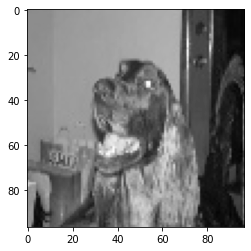

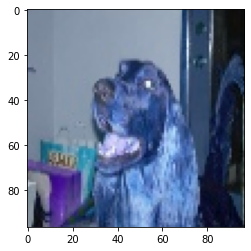

In [7]:
imgplot = plt.imshow(exp4_feature_bank[21],cmap='gray')
plt.show()
imgplot = plt.imshow(exp4_new_bank[21])
plt.show()

In [8]:
del exp4_new_bank[:]
del exp4_new_bank
del exp4_new_labels[:]
del exp4_new_labels

In [9]:
exp4_bank = []
for photo in exp4_feature_bank:
  pic = np.array(photo)
  pic = pic.astype('float32')
  pic /= 255.0
  exp4_bank.append(pic)
target_dict={k: v for v, k in enumerate(np.unique(exp4_feature_labels))}
target_val=  [target_dict[exp4_feature_labels[i]] for i in range(len(exp4_feature_labels))]
exp4_nn_data = np.array(exp4_bank, np.float32)
exp4_nn_labels = np.array(list(map(int,target_val)), np.float32)
print(len(exp4_nn_data),len(exp4_nn_labels))

30000 30000


In [10]:
print(exp4_nn_labels)

[47. 47. 47. ... 23. 23. 23.]


In [11]:
del exp4_feature_bank[:]
del exp4_feature_bank
del exp4_feature_labels[:]
del exp4_feature_labels
del exp4_bank[:]
del exp4_bank

In [12]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[size, size, 1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.Dense(80, activation='relu'))
cnn.add(tf.keras.layers.Dense(120, activation='softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 95, 95, 48)        480       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 48)        20784     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 32)        13856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 32)       0

In [18]:
cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = cnn.fit(exp4_nn_data,exp4_nn_labels, epochs=7,validation_split=0.3)

Epoch 1/7
657/657 [==============================] - 19s 29ms/step - loss: 2.2868 - accuracy: 0.3787 - val_loss: 5.7819 - val_accuracy: 0.1623
Epoch 2/7
657/657 [==============================] - 18s 28ms/step - loss: 2.1657 - accuracy: 0.4093 - val_loss: 6.3144 - val_accuracy: 0.1260
Epoch 3/7
657/657 [==============================] - 18s 27ms/step - loss: 2.1144 - accuracy: 0.4181 - val_loss: 6.7432 - val_accuracy: 0.1203
Epoch 4/7
657/657 [==============================] - 18s 28ms/step - loss: 2.0739 - accuracy: 0.4273 - val_loss: 6.8338 - val_accuracy: 0.0993
Epoch 5/7
657/657 [==============================] - 18s 27ms/step - loss: 2.0194 - accuracy: 0.4414 - val_loss: 7.2530 - val_accuracy: 0.0951
Epoch 6/7
657/657 [==============================] - 18s 28ms/step - loss: 1.9821 - accuracy: 0.4475 - val_loss: 7.7321 - val_accuracy: 0.0923
Epoch 7/7
657/657 [==============================] - 18s 27ms/step - loss: 1.9608 - accuracy: 0.4570 - val_loss: 7.8164 - val_accuracy: 0.0894

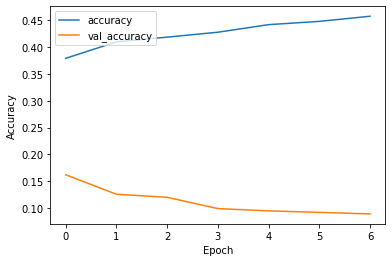

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

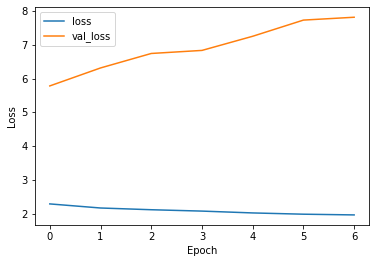

In [20]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Results:

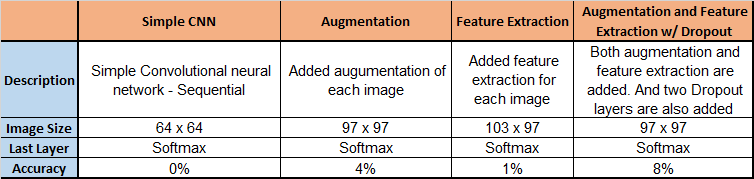